# Imports

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
with open('../Pickled_Model/cvec.pkl', 'rb') as pickle_in:
    cvec = pickle.load(pickle_in)
with open('../Pickled_Model/OneHotEncoder.pkl', 'rb') as pickle_in:
    oh = pickle.load(pickle_in)
with open('../Pickled_Model/Production_Model.pkl', 'rb') as pickle_in:
    extra = pickle.load(pickle_in)

In [3]:
test = pd.read_csv('../Data/test_data.csv')
test.head()

,make,model,engine_size,trim,num_doors,mileage,reg_year,transmission_type,fuel_type,is_electric,price
0,Smart,fortwo,0.90,Turbo Prime Premium,2,26274,2017,Auto,Petrol,0,10550
1,Volkswagen,Polo,1.20,TSI Match,3,38613,2016,Auto,Petrol,0,11200
2,Honda,Jazz,1.30,SE CVT,5,39881,2017,Auto,Petrol,0,11050
3,Vauxhall,Corsa,1.20,Energy,3,68742,2015,Manual,Petrol,0,6000
4,Ford,Fiesta,1.25,82 Zetec,3,37847,2016,Manual,Petrol,0,7950


# Testing

In [4]:
trimcvec = pd.DataFrame((cvec.transform(test['trim']).todense()),
                        columns=cvec.get_feature_names_out())
dataoh = pd.DataFrame(oh.transform(test[['make','model','transmission_type','fuel_type']])
                      , columns=oh.get_feature_names_out())

vehicles = pd.concat([trimcvec,dataoh], axis=1)
vehicles[['engine_size','num_doors','mileage','reg_year','is_electric']] = test[['engine_size',
                                                'num_doors','mileage','reg_year','is_electric']]
test_preds = extra.predict(vehicles)

In [5]:
results = pd.DataFrame(test_preds, columns=['predictions'])
results['set_prices'] = test['price']
results

,predictions,set_prices
0,12485.132,10550
1,13693.896,11200
2,13824.568,11050
3,7970.302,6000
4,8426.838,7950
5,8404.928,7950
6,7893.140,8000
7,9221.450,8000
8,10034.210,8700
9,12469.712,11150


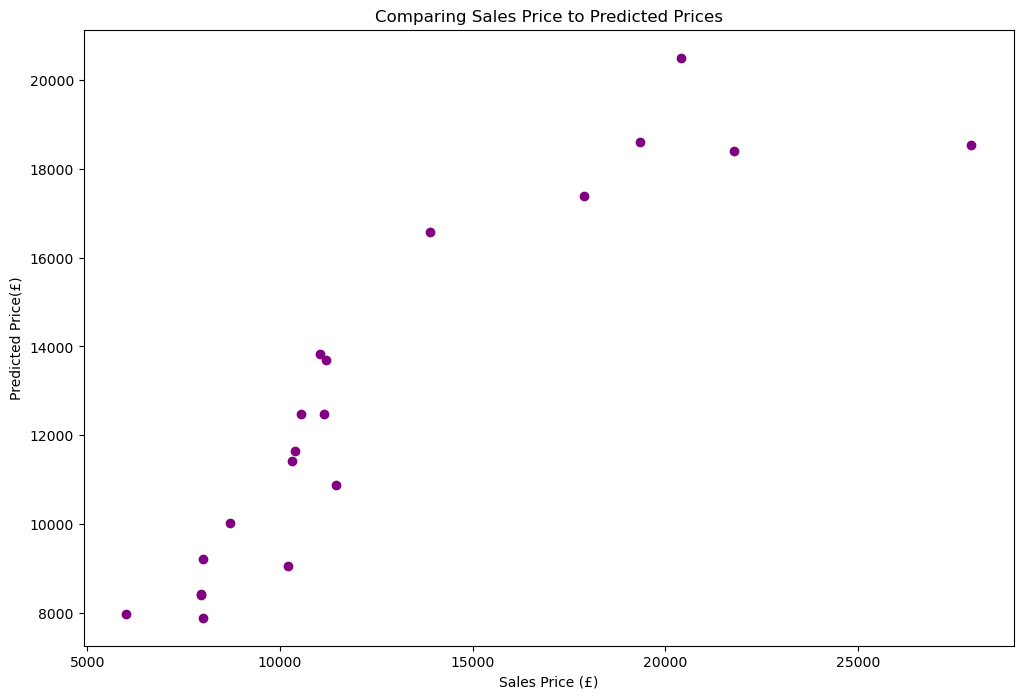

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(results['set_prices'],results['predictions'], c='purple')
plt.xlabel('Sales Price (£)')
plt.ylabel('Predicted Price(£)')
plt.title('Comparing Sales Price to Predicted Prices');

The 2nd hand market can be a tricky market to navigate for general people. The idea behind utilising listing from multiple sources was to capture different perceptives to ensure that the model is not biased on one perticular companies markup. The data used to test this model was taken from a 4th site called Cinch. By doing this we can see in the graph above